In [110]:
pip install xgboost

     |████████████████████████████████| 148.9 MB 321 kB/s eta 0:00:012   |████████████▎                   | 57.3 MB 5.8 MB/s eta 0:00:16     |███████████████████▉            | 92.1 MB 2.6 MB/s eta 0:00:22
Note: you may need to restart the kernel to use updated packages.


In [202]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import datetime    
from hurst import compute_Hc, random_walk
import plotly.graph_objects as go
from stockstats import StockDataFrame as Sdf

In [203]:
%%time
company = "INTC"
start = pd.Timestamp("2005-03-31")
end = pd.Timestamp("2020-09-30")
df = pd.DataFrame(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df = web.DataReader(company, 'yahoo', start, end)
df.to_csv("data/df.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3904 entries, 2005-03-31 to 2020-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3904 non-null   float64
 1   Low        3904 non-null   float64
 2   Open       3904 non-null   float64
 3   Close      3904 non-null   float64
 4   Volume     3904 non-null   float64
 5   Adj Close  3904 non-null   float64
dtypes: float64(6)
memory usage: 213.5 KB
CPU times: user 103 ms, sys: 4.04 ms, total: 107 ms
Wall time: 890 ms


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-03-31,23.540001,23.129999,23.510000,23.230000,41543800.0,14.905715
2005-04-01,23.440001,22.900000,23.340000,23.010000,68253800.0,14.764546
2005-04-04,23.110001,22.650000,23.100000,22.930000,60426700.0,14.713216
2005-04-05,23.250000,22.969999,23.000000,23.129999,48086400.0,14.841551
2005-04-06,23.309999,23.000000,23.209999,23.049999,53942200.0,14.790208
...,...,...,...,...,...,...
2020-09-24,49.639999,48.419998,48.529999,49.160000,29343400.0,48.805016
2020-09-25,50.279999,48.750000,48.959999,49.939999,26633400.0,49.579384
2020-09-28,51.459999,50.160000,50.509998,51.430000,29652200.0,51.058624


In [204]:
stock_df = Sdf.retype(df)

signal = stock_df['macds']        # Your signal line
macd   = stock_df['macd']         # The MACD that need to cross the signal line
#                                              to give you a Buy/Sell signal
listLongShort = [0]    # Since you need at least two days in the for loop

for i in range(1, len(signal)):
    #                          # If the MACD crosses the signal line upward
    if macd[i] > signal[i] and macd[i - 1] <= signal[i - 1]:
        listLongShort.append(1)
    #                          # The other way around
    elif macd[i] < signal[i] and macd[i - 1] >= signal[i - 1]:
        listLongShort.append(-1)
    #                          # Do nothing if not crossed
    else:
        listLongShort.append(0)

df['advice'] = listLongShort
df['advice'] = df['advice'].astype(np.int8)

cols = [
        "rsi_15", "rsi_25", "rsi_40", "macd", "boll_ub", "boll_lb", 
        "dma", "cci_15", "cci_25", 
        "tr", "atr", "vr", "tema",
        "cr", "cr-ma1", "cr-ma2", "cr-ma3",
        "wr_15", "wr_25", "wr_40", "kdjk"
       ]
for col in cols:
    df[col] = stock_df[col]
    
df.dropna(inplace=True)

df.head(5).T

Date,2005-04-14,2005-04-15,2005-04-18,2005-04-19,2005-04-20
high,2.280000e+01,2.250000e+01,2.249000e+01,2.269000e+01,2.344000e+01
low,2.247000e+01,2.194000e+01,2.210000e+01,2.230000e+01,2.263000e+01
open,2.274000e+01,2.222000e+01,2.223000e+01,2.251000e+01,2.340000e+01
close,2.249000e+01,2.212000e+01,2.221000e+01,2.263000e+01,2.266000e+01
volume,6.801400e+07,9.248440e+07,5.376160e+07,8.377420e+07,1.101766e+08
adj close,1.443089e+01,1.419347e+01,1.425122e+01,1.452072e+01,1.453997e+01
close_12_ema,2.299638e+01,2.284057e+01,2.273107e+01,2.271386e+01,2.270484e+01
close_26_ema,2.303638e+01,2.292379e+01,2.284017e+01,2.281656e+01,2.279963e+01
macd,-3.999593e-02,-8.322232e-02,-1.090924e-01,-1.026980e-01,-9.478500e-02
macd_9_ema,-5.638550e-03,-2.230029e-02,-4.066851e-02,-5.364512e-02,-6.217315e-02


In [205]:
#def split(df=df, 
pivot_val="2017-04-15"
pivot_test="2018-04-15"
pred_col="open"
prognosis_len=30
_df = df.copy()
cols = []
for i in range(1, prognosis_len+1):
    exec(f"cols.append('{pred_col}_lag_{i}')")
    exec(f"_df['{pred_col}_lag_{i}'] = _df[pred_col].shift(periods=i)")
    
def compute_hurst(series):
    series = series.apply(np.exp)
    H, c, data = compute_Hc(series, kind='change', simplified=True)
    return H

_df["hurst_100"] = _df[pred_col].rolling(100).apply(compute_hurst)

_df.dropna(inplace=True)
X_train = _df[_df.index < pd.Timestamp(pivot_val)].drop(cols, axis=1)
Y_train = _df[_df.index < pd.Timestamp(pivot_val)][cols]

X_val = _df[(_df.index > pd.Timestamp(pivot_val)) & (_df.index < pd.Timestamp(pivot_test))].drop(cols, axis=1)
Y_val = _df[(_df.index > pd.Timestamp(pivot_val)) & (_df.index < pd.Timestamp(pivot_test))][cols]

X_test = _df[_df.index > pd.Timestamp(pivot_test)].drop(cols, axis=1)
Y_test = _df[_df.index > pd.Timestamp(pivot_test)][cols]
#return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [208]:
X_train#, Y_train, X_val, Y_val, X_test, Y_test = split()

,high,low,open,close,volume,adj close,close_12_ema,close_26_ema,macd,macd_9_ema,...,tema,cr,cr-ma1,cr-ma2,cr-ma3,wr_15,wr_25,wr_40,kdjk,hurst_100
Date,,,,,,,,,,,,,,,,,,,,,
2005-09-02,25.420000,25.200001,25.379999,25.280001,33334500.0,16.323130,25.669686,26.070011,-0.400324,-0.363170,...,25.302073,62.318228,70.578436,71.314790,104.218615,94.557826,96.747969,97.802200,15.754713,0.495867
2005-09-06,25.740000,25.430000,25.480000,25.700001,37063400.0,16.594316,25.674350,26.042597,-0.368247,-0.364185,...,25.558934,68.142915,74.432906,69.755898,102.561027,53.703700,79.674789,86.263734,29.229747,0.523192
2005-09-07,25.750000,25.469999,25.629999,25.660000,35810100.0,16.568495,25.672142,26.014251,-0.342109,-0.359770,...,25.647769,67.029373,74.433615,69.991237,100.001043,57.407489,81.300843,87.362660,43.825106,0.493279
2005-09-08,26.120001,25.629999,25.670000,26.090000,55398500.0,16.846144,25.736428,26.019863,-0.283435,-0.344503,...,25.984611,68.333411,73.263813,70.208354,97.892858,17.592643,62.127661,75.549463,61.463089,0.490069
2005-09-09,25.870001,25.190001,25.850000,25.250000,99695900.0,16.303759,25.661593,25.962828,-0.301234,-0.335849,...,25.529288,58.917129,71.683553,69.935843,95.858947,94.495463,97.309440,98.356179,43.125911,0.503454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-07,36.320000,35.990002,36.070000,36.029999,15689500.0,32.769459,35.883515,35.808844,0.074671,-0.033669,...,36.070127,115.667431,89.257366,80.664033,70.744100,40.109872,34.761908,34.761908,63.405850,0.595686
2017-04-10,36.090000,35.610001,36.020000,35.799999,19973700.0,32.560272,35.870667,35.808189,0.062478,-0.014440,...,35.869429,106.122525,95.758614,82.711928,70.341608,52.747211,45.714275,45.714275,51.361493,0.517193
2017-04-11,35.790001,35.209999,35.770000,35.740002,22711800.0,32.505699,35.850564,35.803138,0.047426,-0.002067,...,35.742695,103.509781,101.440797,83.082561,70.275109,56.043781,48.571304,48.571304,45.638906,0.478576


In [211]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, Input
from keras import backend as K
from keras.models import Sequential, load_model, Model
from datetime import datetime, timedelta

In [ ]:
inputs= Input(shape=(1, self.X_train.shape[1]))

x = LSTM(64, activation='tanh', return_sequences=True)(inputs)
x = LSTM(32, activation='relu', return_sequences=True)(x)
x = Dropout(0.1)(x)
x = LSTM(32, activation='relu')(x)

out1 = Dense(1,  activation='linear')(x)
out2 = Dense(1,  activation='linear')(x)
out3 = Dense(1,  activation='linear')(x)
out4 = Dense(1,  activation='linear')(x)
out5 = Dense(1,  activation='linear')(x)
out6 = Dense(1,  activation='linear')(x)
out7 = Dense(1,  activation='linear')(x)

lstm_model = Model(inputs=inputs, outputs=[out1,out2,out3,out4,out5,out6,out7])
lstm_model.compile(optimizer = "adam", loss = 'rmse')

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)
lstm_model.fit(self.X_train.reshape(self.X_train.shape[0], 1, self.X_train.shape[1]), list(self.y_train.T), epochs=400, verbose=0, callbacks=[es]);
models.append(lstm_model)

self.models = models
        
    def predict(self):
        preds = []
        for model in self.models:
            preds.append(model.predict(self.X_test.reshape(self.X_test.shape[0], 1, self.X_test.shape[1])))
        preds = np.array(preds)
        preds = preds.sum(axis=0)/preds.shape[0]
        preds = preds.reshape(preds.shape[0], preds.shape[1])
        self.preds = preds
        
    def plot_training_loss(self):
        plt.rcParams['figure.figsize'] = (30,10)
        loss = []
        for i in self.models:
            loss.append(np.array(i.history.history['loss']))
            ax = plt.plot(np.array(i.history.history['loss']))
            plt.grid(alpha=0.3, which='both')
        plt.title('Train loss')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.show();

In [15]:
fig = go.Figure(data=[go.Candlestick(x=company_hist.index,
                open=company_hist['Open'],
                high=company_hist['High'],
                low=company_hist['Low'],
                close=company_hist['Close'])])
fig.show()

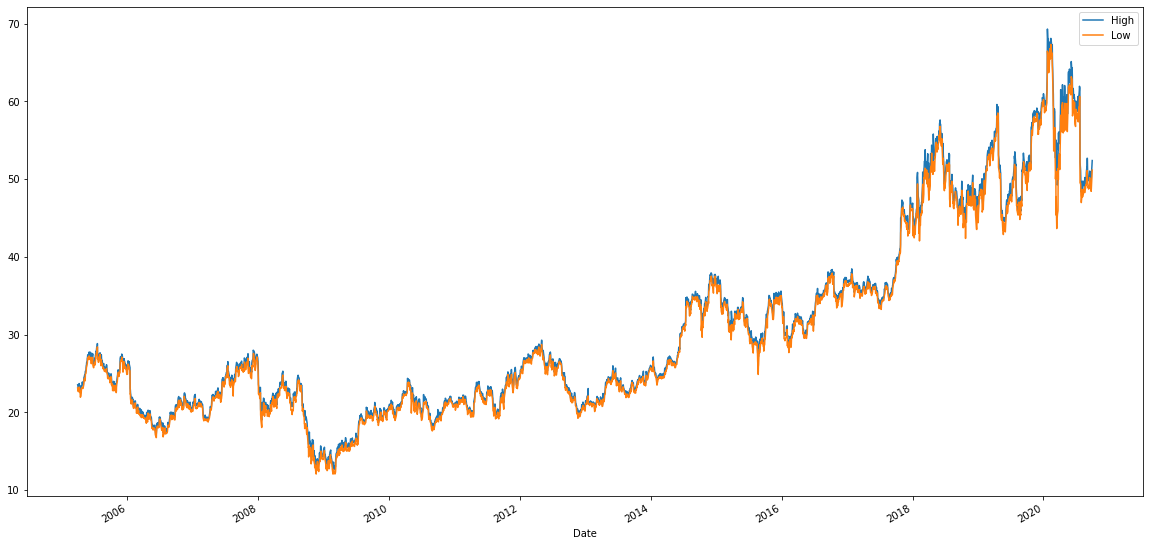

In [16]:
company_hist[["High", "Low"]].plot(figsize=(20,10));

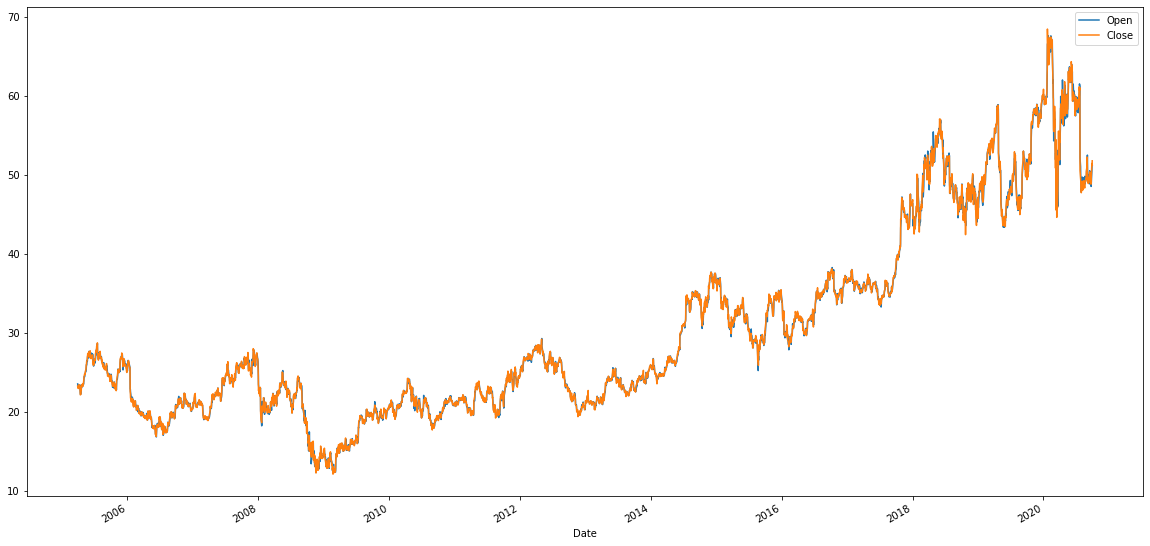

In [17]:
company_hist[["Open", "Close"]].plot(figsize=(20,10));

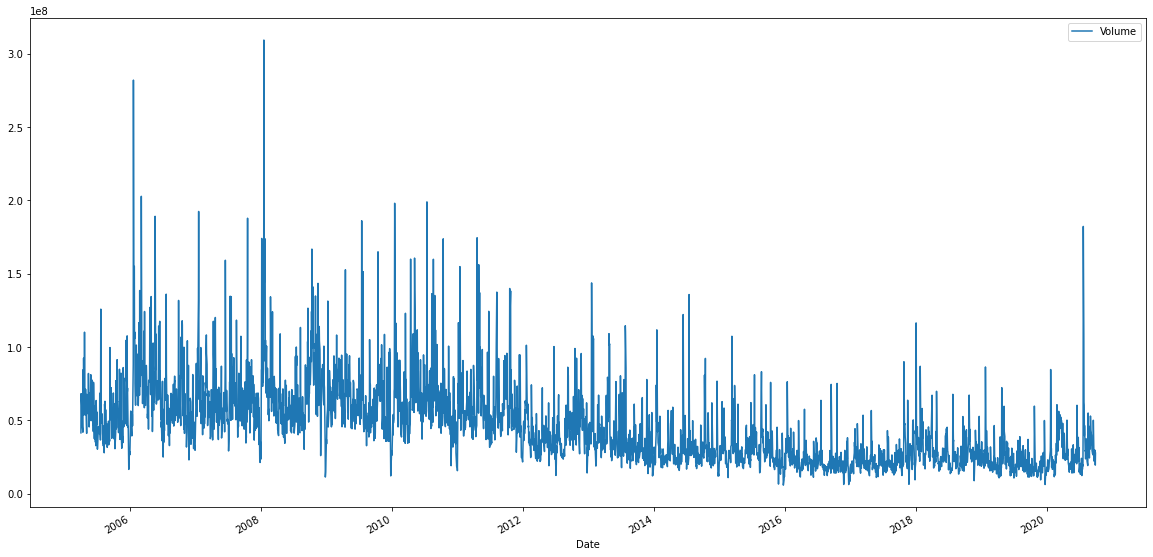

In [18]:
company_hist[["Volume"]].plot(figsize=(20,10));

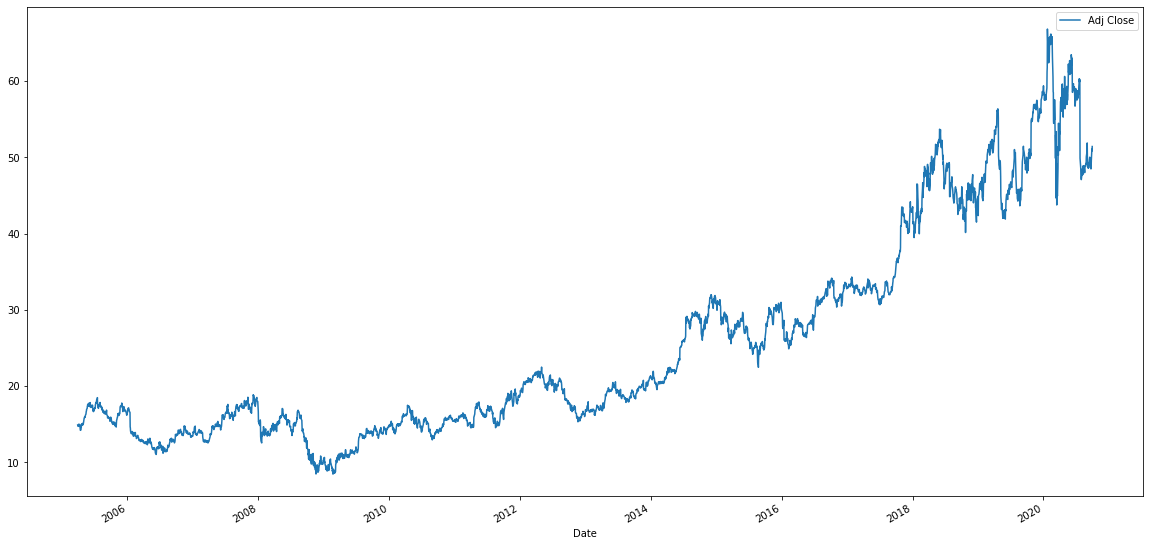

In [19]:
company_hist[["Adj Close"]].plot(figsize=(20,10));